In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('C:/Users/peter/Desktop/DOI - Mai/data/HR_comma_sep.csv', index_col=None)

In [7]:
# Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [8]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [99]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [10]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [11]:
# The dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [12]:
# Check the type of our features. 
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [13]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [14]:
# Display the statistical overview of the employees
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [15]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Correlation Matrix & Heatmap

Moderate Positively Correlated Features:

projectCount vs evaluation: 0.349333
projectCount vs averageMonthlyHours: 0.417211
averageMonthlyHours vs evaluation: 0.339742

Moderate Negatively Correlated Feature:

satisfaction vs turnover: -0.388375

Summary:

From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


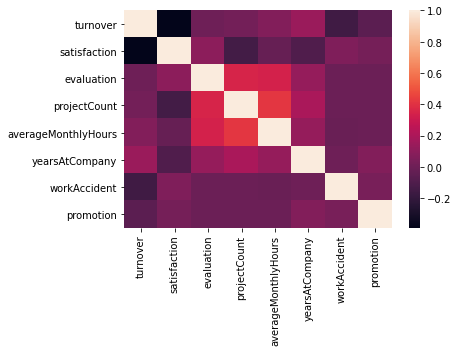

In [16]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employee Count')

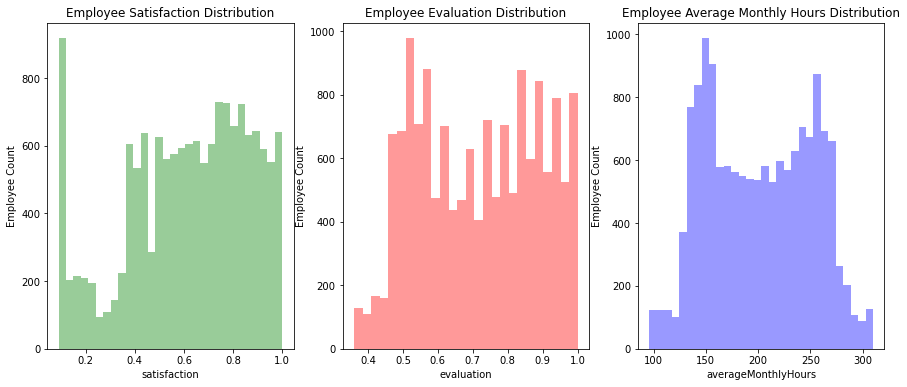

In [17]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

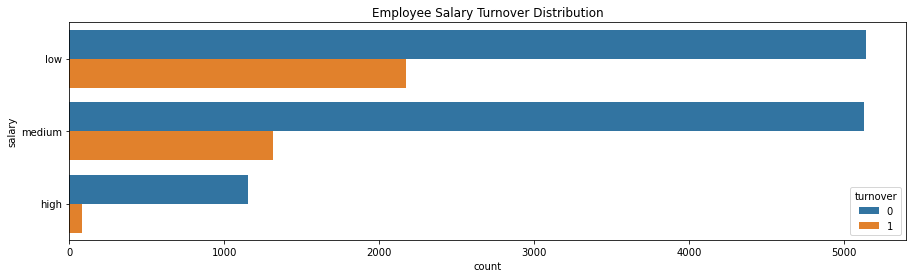

In [18]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

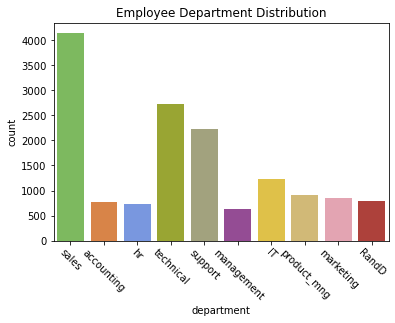

In [19]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

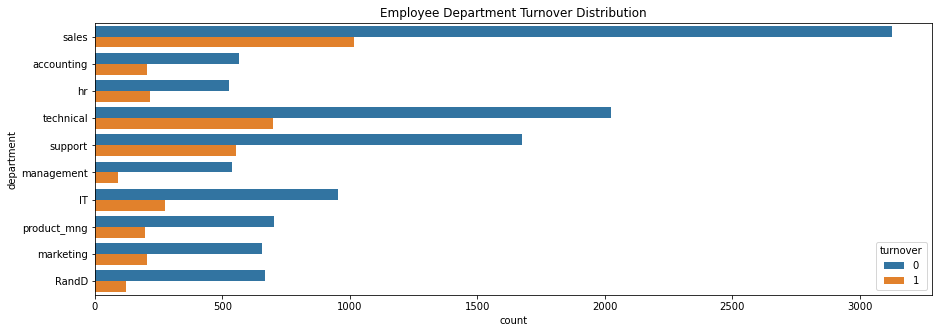

In [20]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

[Text(0, 0.5, 'Percent')]

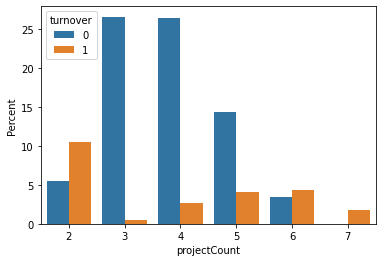

In [21]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

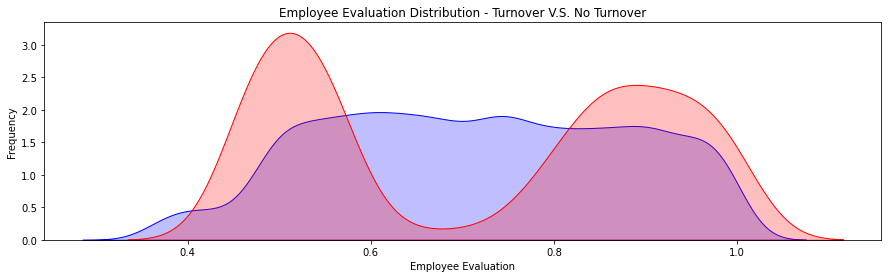

In [22]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

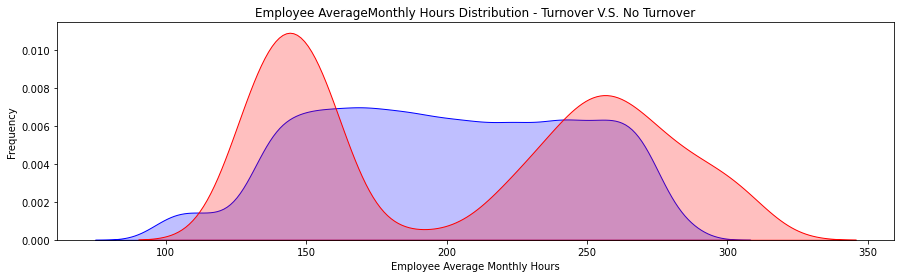

In [23]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

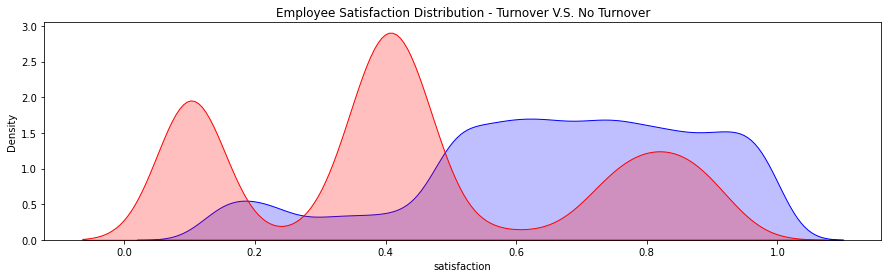

In [24]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

<AxesSubplot:xlabel='projectCount', ylabel='averageMonthlyHours'>

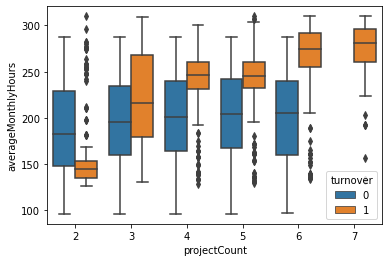

In [25]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

<AxesSubplot:xlabel='projectCount', ylabel='evaluation'>

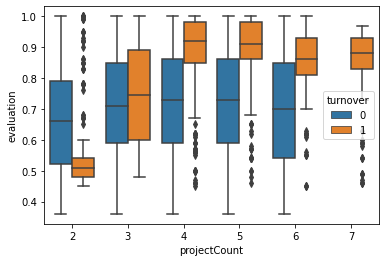

In [26]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

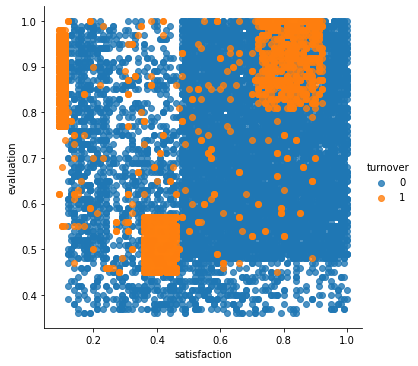

In [27]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

[Text(0, 0.5, 'Percent')]

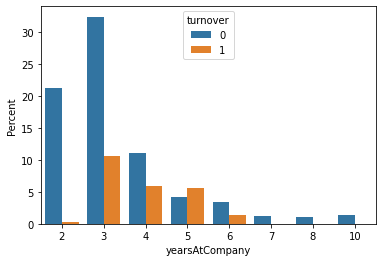

In [28]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

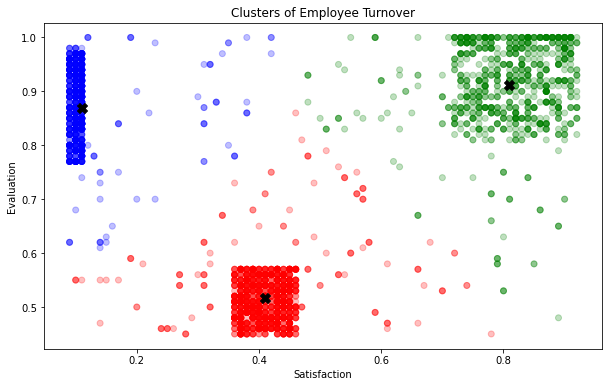

In [29]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

In [128]:
df = pd.read_csv('C:/Users/peter/Desktop/DOI - Mai/data/HR_comma_sep.csv', index_col=None)

In [129]:
import seaborn as sns
from matplotlib import pyplot as plt

In [130]:
df.left = df.left.map({
    0:'False',  #True (1) or False (0) in boolean logic. 
    1:'True'
})
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,True,0,sales,low
1,0.80,0.86,5,262,6,0,True,0,sales,medium
2,0.11,0.88,7,272,4,0,True,0,sales,medium
3,0.72,0.87,5,223,5,0,True,0,sales,low
4,0.37,0.52,2,159,3,0,True,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,True,0,support,low
14995,0.37,0.48,2,160,3,0,True,0,support,low
14996,0.37,0.53,2,143,3,0,True,0,support,low
14997,0.11,0.96,6,280,4,0,True,0,support,low


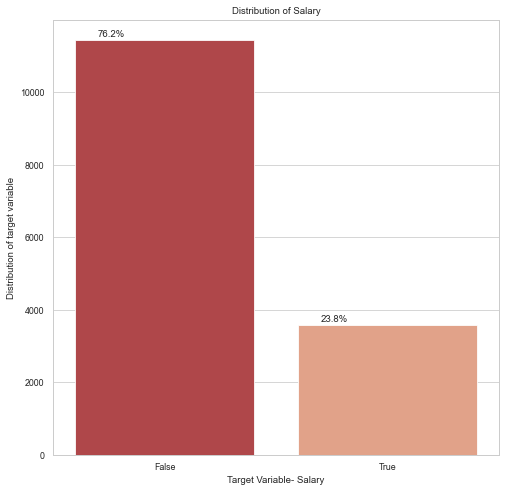

In [131]:
plt.figure(figsize=(8,8))
ax=sns.countplot(data=df,x=df['left'],order=df['left'].value_counts().index)
plt.xlabel('Target Variable- Salary')
plt.ylabel('Distribution of target variable')
plt.title('Distribution of Salary')
total = len(df)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+100))

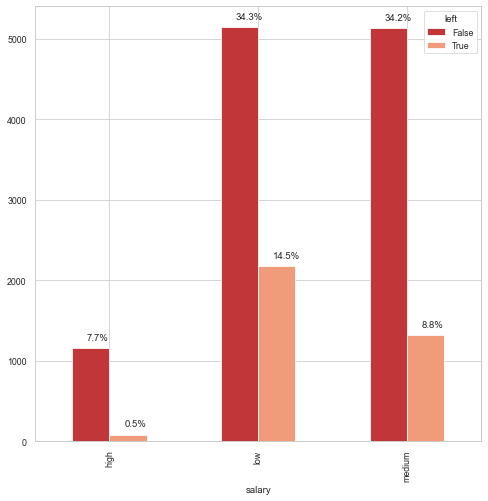

In [132]:
ax=pd.crosstab(df.salary,df.left).plot(kind='bar',figsize=(8,8))
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+100))

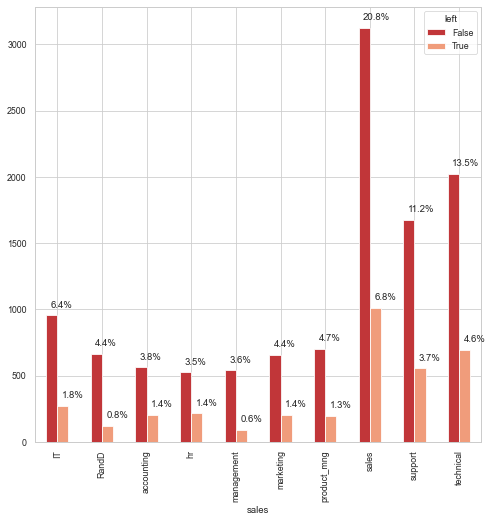

In [134]:
ax=pd.crosstab(df.sales,df.left).plot(kind='bar',figsize=(8,8))
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+60))

C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


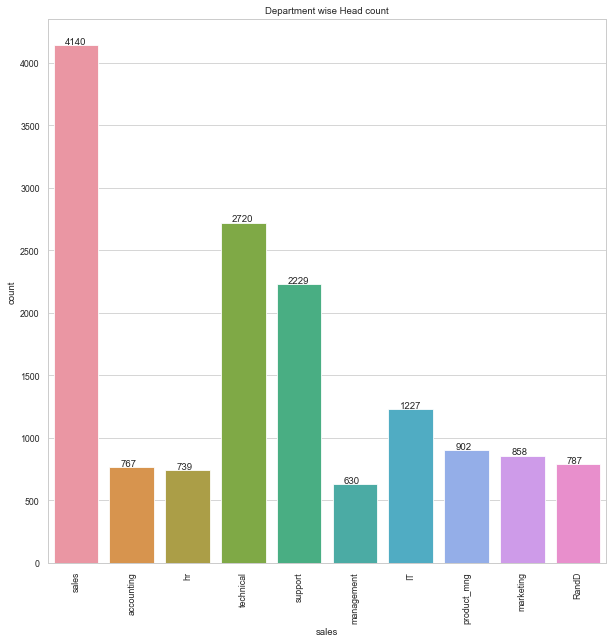

In [104]:
plt.figure(figsize=(10,10))
dept_list = df['sales'].unique()
ax = sns.countplot(df['sales'])
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+.2,p.get_height()+10))
ax.set_title('Department wise Head count')    
plt.show()

<ipython-input-105-9bac3fb828e2>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels = dept_list,rotation=60)
C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-105-9bac3fb828e2>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(labels = dept_list,r

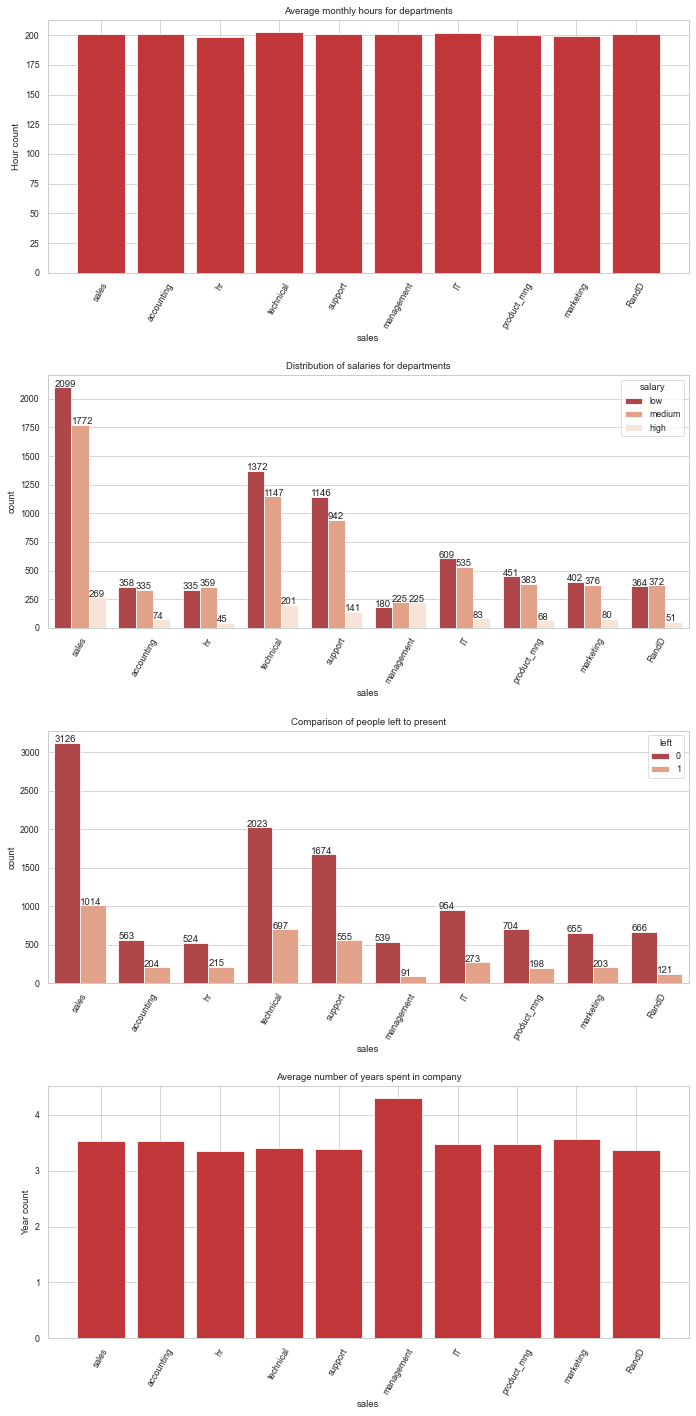

In [105]:
dep_grp = df.groupby('sales')
avg_hrs = []
yrs_spent = []
fig,ax = plt.subplots(4,1)
fig.set_figheight(20)
fig.set_figwidth(10)
for dept in dept_list:
    avg_hrs.append(dep_grp['average_montly_hours'].mean().loc[dept])
    yrs_spent.append(dep_grp['time_spend_company'].mean().loc[dept])
ax[0].bar(dept_list,avg_hrs)
ax[0].set_title('Average monthly hours for departments')
ax[0].set_xlabel('sales')
ax[0].set_ylabel('Hour count')
ax[0].set_xticklabels(labels = dept_list,rotation=60)
sns.countplot(df['sales'],hue = df['salary'],ax=ax[1])
ax[1].set_title('Distribution of salaries for departments')
ax[1].set_xticklabels(labels = dept_list,rotation=60)
for p in ax[1].patches:
    ax[1].annotate(p.get_height(),(p.get_x(),p.get_height()+5))
sns.countplot(df['sales'],hue = df['left'],ax=ax[2])
ax[2].set_title('Comparison of people left to present')
ax[2].set_xticklabels(labels = dept_list,rotation=60)
for p in ax[2].patches:
    ax[2].annotate(p.get_height(),(p.get_x(),p.get_height()+5))
ax[3].bar(dept_list,yrs_spent)
ax[3].set_title('Average number of years spent in company')
ax[3].set_xlabel('sales')
ax[3].set_ylabel('Year count')
ax[3].set_xticklabels(labels = dept_list,rotation=60)    
fig.tight_layout(pad=2.0)


#plt.show()

<ipython-input-31-20e4366f8e1e>:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts(),width=0.3,color = 'bry')


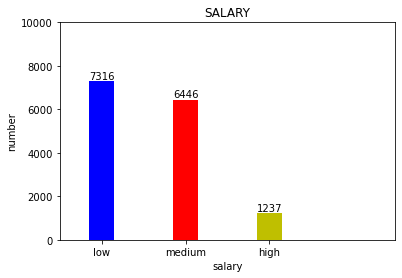

In [31]:
plt.title('SALARY')
plt.xlabel('salary')
plt.ylabel('number')
plt.axis([0,4,0,10000])
plt.xticks(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts().index)
plt.bar(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts(),width=0.3,color = 'bry')
for x,y in zip(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts()):
    plt.text(x,y,y,ha='center',va = 'bottom')

<AxesSubplot:xlabel='salary', ylabel='count'>

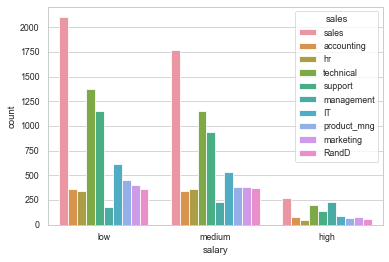

In [32]:
sns.set_style(style='whitegrid')  #darkgrid, whitegrid, dark, white, ticks
sns.set_context(context='paper',font_scale=1) # context : dict, None, or one of {paper, notebook, talk, poster}
sns.set_palette(sns.color_palette("RdBu"))
sns.countplot(x = 'salary',hue = 'sales',data = df) 
# sns.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs

# plt.title('SALARY')
# plt.xlabel('salary')
#plt.ylabel('number')
#plt.axis([0,4,0,10000])
# plt.xticks(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts().index)
# plt.bar(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts(),width=0.3)
# for x,y in zip(np.arange(len(df['salary'].value_counts()))+0.5,df['salary'].value_counts()):
#   plt.text(x,y,y,ha='center',va = 'bottom')

C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

<AxesSubplot:xlabel='average_montly_hours', ylabel='eeee'>

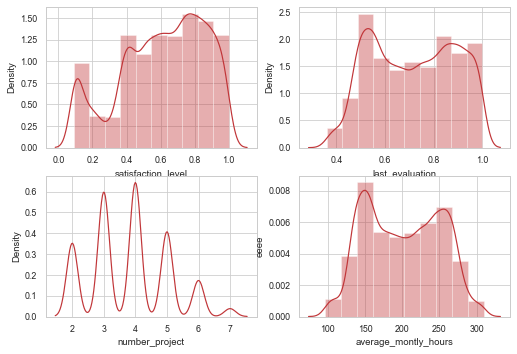

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
sns.distplot(df['satisfaction_level'],bins = 10)
ax2 = fig.add_subplot(2,2,2)
sns.distplot(df['last_evaluation'],bins = 10)
ax3 = fig.add_subplot(2,2,3)
sns.distplot(df['number_project'],bins = np.arange(df['number_project'].min(),df['number_project'].max(),1),hist = False)
plt.subplots_adjust(right = 1.2,top = 1.2)
ax4 = fig.add_subplot(2,2,4)
ax4.set_ylabel('eeee')
sns.distplot(df['average_montly_hours'],bins = 10) #np.arange(df['average_montly_hours'].min(),df['average_montly_hours'].max()+20,20) ,
             # kde = False,axlabel=('Hours'))

In [34]:
sub_df = df.groupby('time_spend_company').mean()
sub_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,left,promotion_last_5years
time_spend_company,,,,,,,
2,0.697078,0.717596,3.687423,200.133169,0.172010,0.016338,0.016646
3,0.626314,0.668721,3.327798,186.632935,0.138910,0.246159,0.020798
4,0.467517,0.767927,4.627689,223.455221,0.124364,0.348064,0.013688
5,0.610305,0.813666,4.519348,222.978955,0.116090,0.565513,0.011541
6,0.603440,0.754875,4.213092,212.051532,0.149025,0.291086,0.023677
7,0.635957,0.682766,3.851064,200.744681,0.138298,0.000000,0.191489
8,0.665062,0.711975,3.777778,193.802469,0.271605,0.000000,0.061728
10,0.655327,0.731495,3.682243,199.224299,0.233645,0.000000,0.074766


C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_spend_company', ylabel='left'>

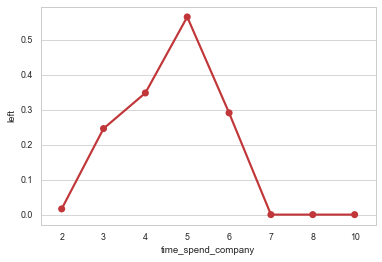

In [35]:
sns.pointplot(sub_df.index,sub_df['left'])

<AxesSubplot:xlabel='time_spend_company', ylabel='left'>

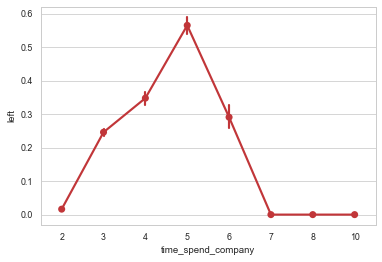

In [36]:
sns.pointplot(x = 'time_spend_company',y = 'left',data = df)

([<matplotlib.patches.Wedge at 0x20c657efac0>,
 [Text(0.776414318993718, 0.9149758495509712, 'sales'),
  Text(-0.7361690652250792, 0.8173463815333333, 'technical'),
  Text(-1.078295473144608, -0.21743705433031926, 'support'),
  Text(-0.6639038295740627, -0.8770585528212437, 'IT'),
  Text(-0.220711694218203, -1.0776299680480914, 'product_mng'),
  Text(0.1824348726672272, -1.0847661117655236, 'marketing'),
  Text(0.5381184913305728, -0.9593896441426228, 'RandD'),
  Text(0.8166516060190341, -0.7369397223562675, 'accounting'),
  Text(1.004980939261518, -0.4472284782088872, 'hr'),
  Text(1.090437030943069, -0.1447310662852455, 'management')],
 [Text(0.45290835274633545, 0.5337359122380665, '27.6%'),
  Text(-0.40154676285004315, 0.44582529901818174, '18.1%'),
  Text(-0.5881611671697861, -0.11860202963471958, '14.9%'),
  Text(-0.36212936158585235, -0.4783955742661329, '8.2%'),
  Text(-0.12038819684629253, -0.587798164389868, '6.0%'),
  Text(0.09950993054576027, -0.5916906064175583, '5.7%'),
 

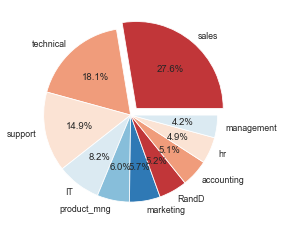

In [37]:
lbs=df['sales'].value_counts().index
explodes = [0.1 if i == 'sales' else 0 for i in lbs]
plt.pie(df['sales'].value_counts(normalize= True),labels =lbs,autopct='%1.1f%%',explode=explodes)

<ipython-input-38-1d62eef53632>:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(df['salary'].value_counts(normalize= True),labels =lbs,autopct='%1.1f%%',explode=explodes)


([<matplotlib.patches.Wedge at 0x20c65866610>,
 [Text(0.04611030952732935, 1.1991137724816998, 'low'),
  Text(-0.32247422223497674, -1.051670279124568, 'medium'),
  Text(1.06328474507822, -0.28182539077227425, 'high')],
 [Text(0.026897680557608782, 0.6994830339476582, '48.8%'),
  Text(-0.1758950303099873, -0.5736383340679462, '43.0%'),
  Text(0.5799734973153926, -0.1537229404212405, '8.2%')])

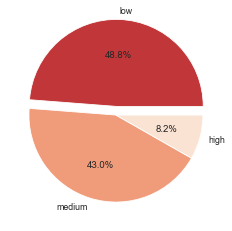

In [38]:
lbs=df['salary'].value_counts().index
explodes = [0.1 if i == 'low' else 0 for i in lbs]
plt.pie(df['salary'].value_counts(normalize= True),labels =lbs,autopct='%1.1f%%',explode=explodes)

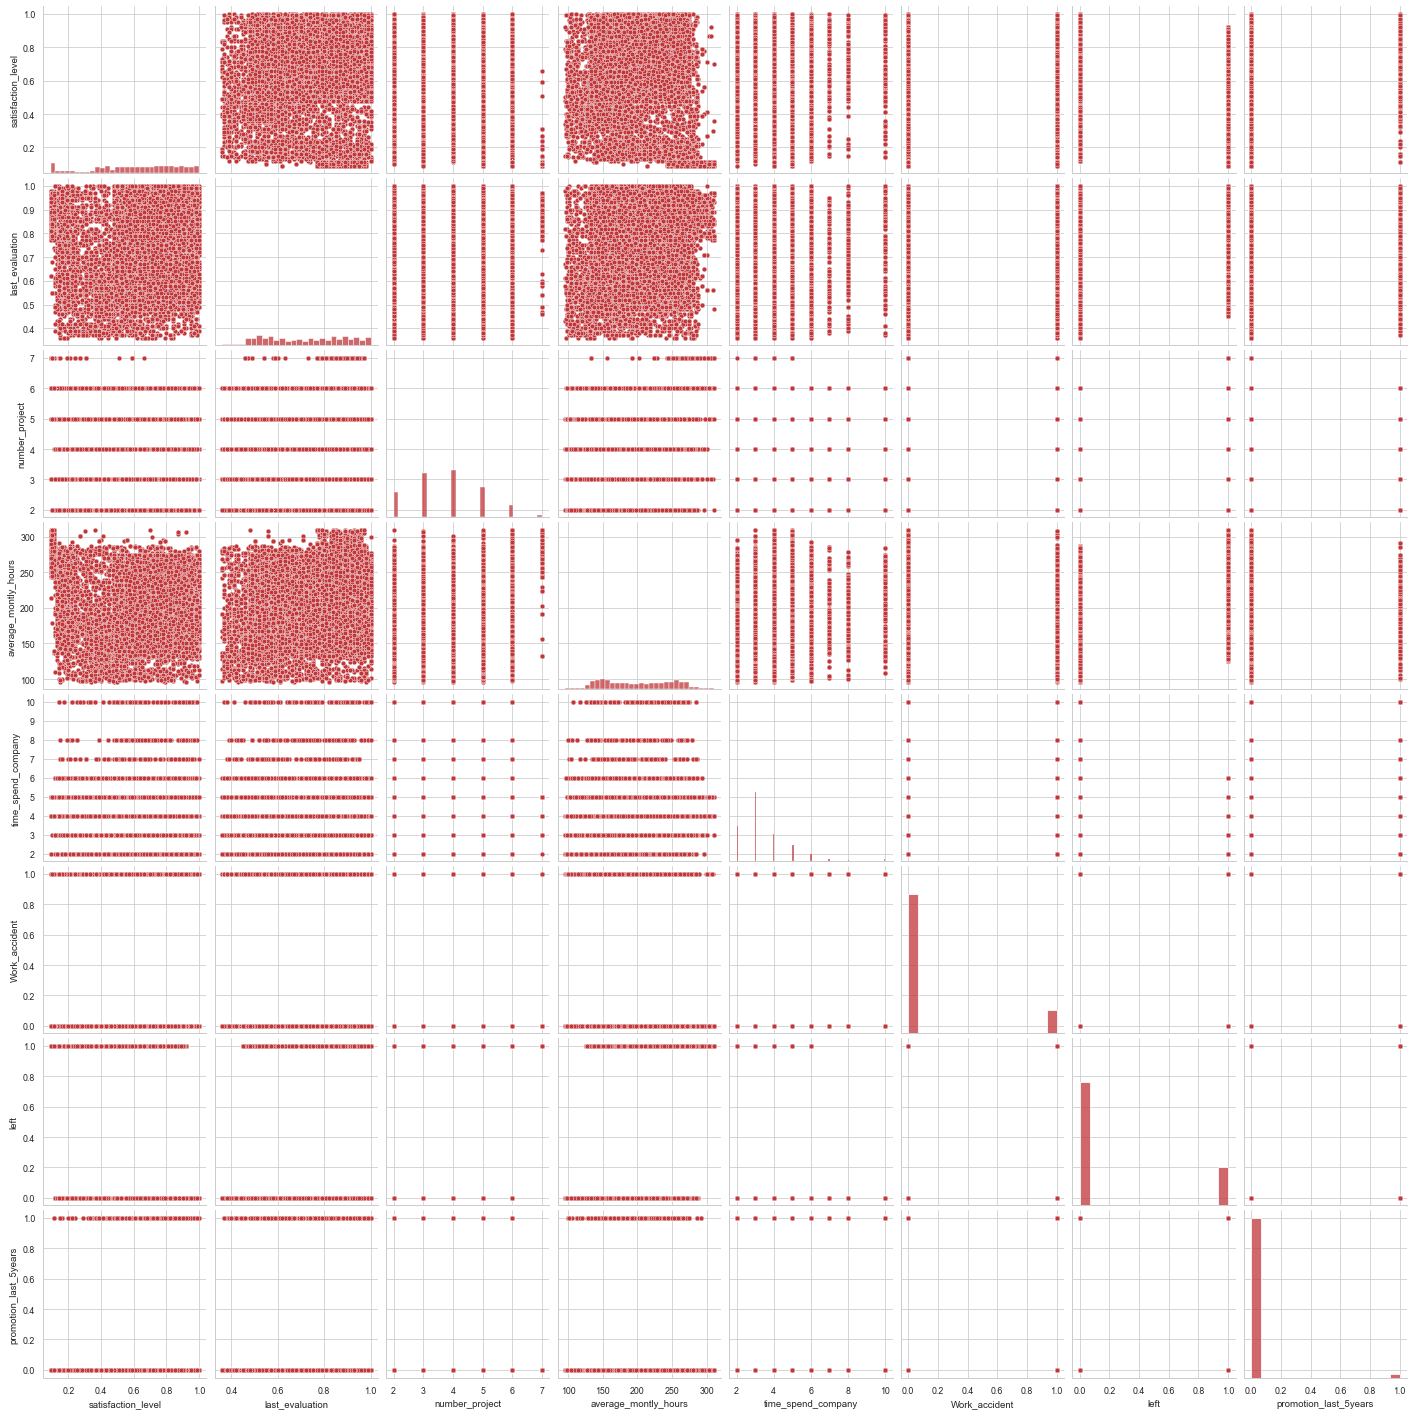

In [39]:
sns.pairplot(df)

C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

Text(0.5, 1.0, 'Satisfcation Level by salary band')

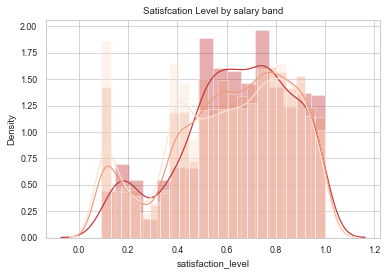

In [40]:
sns.set_color_codes()
for val in set(df["salary"]):
    x = df.loc[df["salary"] == val, "satisfaction_level"]
    ax = sns.distplot(x)
plt.title("Satisfcation Level by salary band")

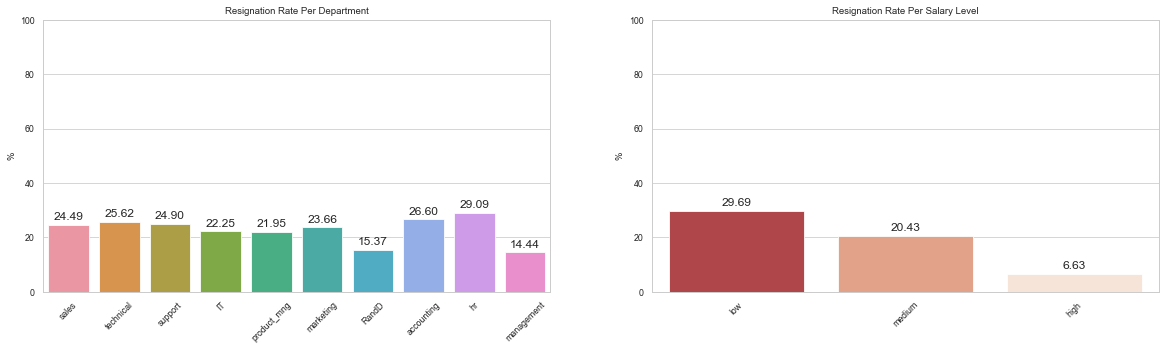

In [42]:
department_list=df['sales'].value_counts()
ret_ratio=df.groupby('sales')['left'].value_counts()
ratio_arr=np.zeros(len(department_list))

i=0
for j in department_list.keys():
    #print(j,'--> Stay: ',ret_ratio[j][0],'Left: ',ret_ratio[j][1])
    ratio_arr[i]=100*ret_ratio[j][1]/(ret_ratio[j][0]+ret_ratio[j][1])
    i=i+1

salary_list=df['salary'].value_counts()

sal_ratio=df.groupby('salary')['left'].value_counts()
sal_arr=np.zeros(len(salary_list))

i=0
for j in salary_list.keys():
    #print(j,'--> Stay: ',ret_ratio[j][0],'Left: ',ret_ratio[j][1])
    sal_arr[i]=100*sal_ratio[j][1]/(sal_ratio[j][0]+sal_ratio[j][1])
    i=i+1


fig,ax = plt.subplots(ncols=2,figsize=(20,5))

plt.sca(ax[0])
_rt_bar=sns.barplot(x=department_list.keys(),y=ratio_arr)
_rt_title=plt.title('Resignation Rate Per Department')
for bar in _rt_bar.patches:
    _rt_bar.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=12, xytext=(0, 8), 
                   textcoords='offset points') 
_rt_xtick=plt.xticks(rotation=45)
_rt_ylim=plt.ylim(0,100)
_rt_ylabel=plt.ylabel('%')

plt.sca(ax[1])
_rt_bar=sns.barplot(x=salary_list.keys(),y=sal_arr)
_rt_title=plt.title('Resignation Rate Per Salary Level')
for bar in _rt_bar.patches:
    _rt_bar.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=12, xytext=(0, 8), 
                   textcoords='offset points') 
_rt_xtick=plt.xticks(rotation=45)
_rt_ylim=plt.ylim(0,100)
_rt_ylabel=plt.ylabel('%')

<AxesSubplot:xlabel='last_evaluation', ylabel='average_montly_hours'>

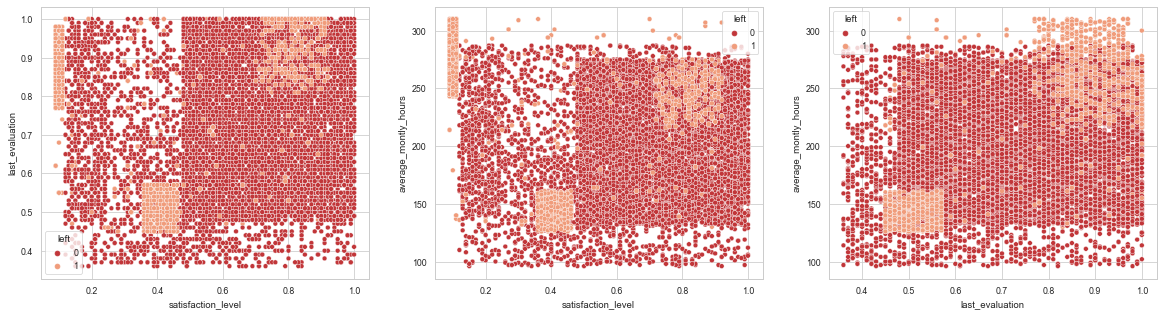

In [43]:
fig,ax=plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(data=df,x='satisfaction_level',y='last_evaluation',hue='left', ax=ax[0])
sns.scatterplot(data=df,x='satisfaction_level',y='average_montly_hours',hue='left', ax=ax[1])
sns.scatterplot(data=df,x='last_evaluation',y='average_montly_hours',hue='left', ax=ax[2])

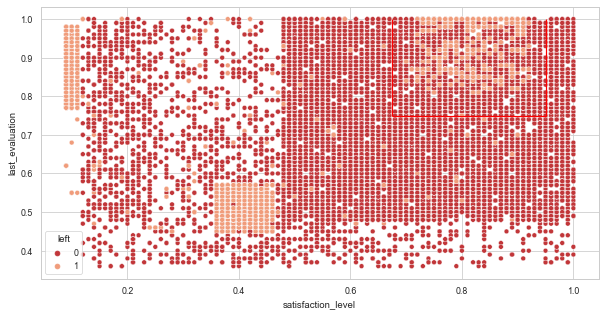

In [44]:
fig=plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='satisfaction_level',y='last_evaluation',hue='left')
plt.vlines(0.675,0.75,1.0,'red')
plt.hlines(0.75,0.675,0.95,'red')
plt.vlines(0.95,0.75,1.0,'red')

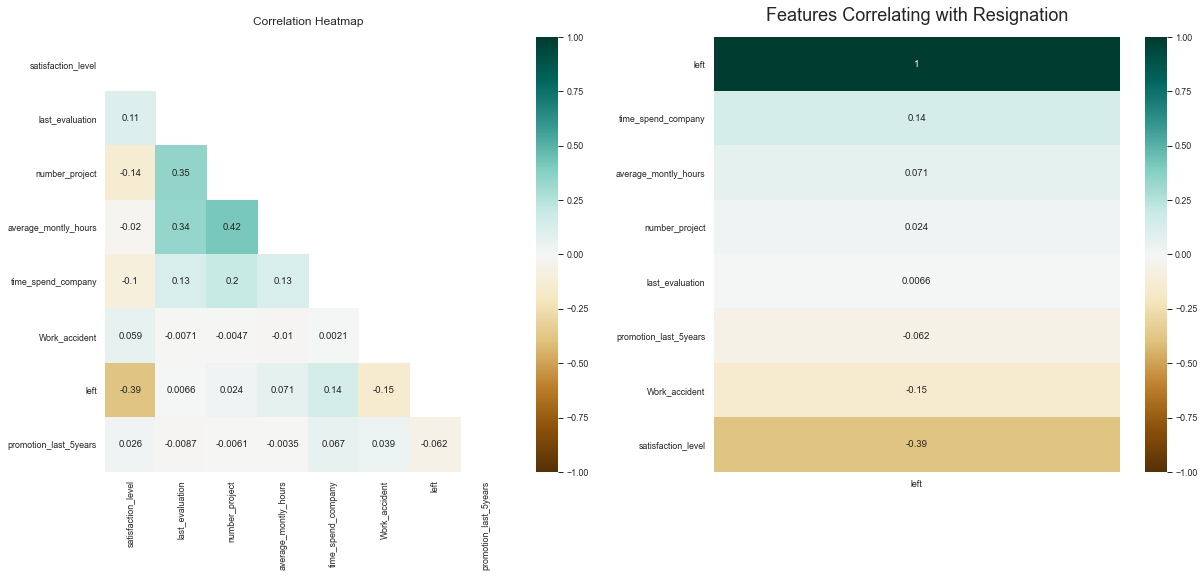

In [45]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr=df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG',ax=ax[0])
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

heatmap = sns.heatmap(resign_corr[['left']].sort_values(by='left', ascending=False),vmin=-1, vmax=1, annot=True, cmap='BrBG',ax=ax[1])
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':18}, pad=16);

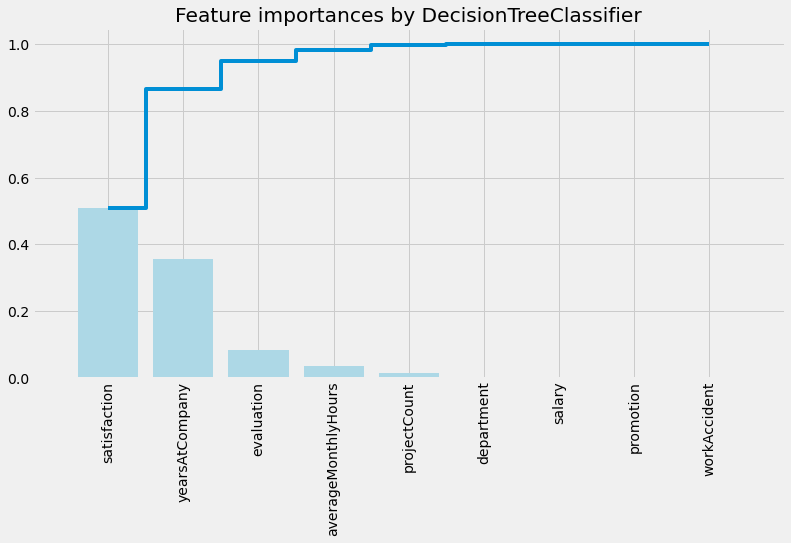

In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Modeling the Data: Logistic Regression Analysis

In [29]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
#Read the analytics csv file and store our dataset into a dataframe called "df"
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
df = pd.read_csv('C:/Users/peter/Desktop/DOI - Mai/data/HR_comma_sep.csv', index_col=None)

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes


# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)

# Create an intercept term for the logistic regression equation
df['int'] = 1
indep_var = ['satisfaction', 'evaluation', 'yearsAtCompany', 'int', 'turnover']
df = df[indep_var]

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()
#

,satisfaction,evaluation,yearsAtCompany,int
9003,0.59,1.00,3,1
5697,0.81,0.98,2,1
10691,1.00,0.93,2,1
1884,0.87,0.91,5,1
13572,0.87,0.48,3,1


Using Logistic Regression Coefficients

In [30]:
import statsmodels.api as sm
iv = ['satisfaction','evaluation','yearsAtCompany', 'int']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.467233
         Iterations 6


satisfaction     -3.769022
evaluation        0.207596
yearsAtCompany    0.170145
int               0.181896
dtype: float64

In [31]:
# Create function to compute coefficients
coef = answer.params
def y (coef, Satisfaction, Evaluation, YearsAtCompany) : 
    return coef[3] + coef[0]*Satisfaction + coef[1]*Evaluation + coef[2]*YearsAtCompany

import numpy as np

# An Employee with 0.7 Satisfaction and 0.8 Evaluation and worked 3 years has a 14% chance of turnover
y1 = y(coef, 0.7, 0.8, 3)
p = np.exp(y1) / (1+np.exp(y1))
p

0.1443146255973825

Intepretation of Score
If you were to use these employee values into the equation:

Satisfaction: 0.7
Evaluation: 0.8
YearsAtCompany: 3
You would get:

Employee Turnover Score = (0.7)(-3.769022) + (0.8)(0.207596) + (3)(0.170145) + 0.181896 = 0.14431 = 14%

Result: This employee would have a 14% chance of leaving the company. This information can then be used to form our retention plan.

Using Other Models

The best model performance out of the four (Decision Tree Model, AdaBoost Model, Logistic Regression Model, Random Forest Model) was Random Forest!

Precision and Recall / Class Imbalance

False Positives (Type I Error): You predict that the employee will leave, but do not

False Negatives (Type II Error): You predict that the employee will not leave, but does leave

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [33]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [34]:
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
#robust_scaler = RobustScaler()
#X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [35]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [36]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.77


In [40]:

kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.793 (0.014)


Logistic Regression V.S. Random Forest V.S. Decision Tree V.S. AdaBoost Model

In [41]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1714
           1       0.00      0.00      0.00       536

    accuracy                           0.76      2250
   macro avg       0.38      0.50      0.43      2250
weighted avg       0.58      0.76      0.66      2250



 ---Logistic Model---
Logistic AUC = 0.74
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1714
           1       0.48      0.73      0.58       536

    accuracy                           0.75      2250
   macro avg       0.69      0.74      0.70      2250
weighted avg       0.80      0.75      0.76      2250



 ---Decision Tree Model---
Decision Tree AUC = 0.94
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1714
           1       0.87      0.91      0.89       536

    accuracy                           0.95   

C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 ---Random Forest Model---
Random Forest AUC = 0.97
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1714
           1       0.95      0.96      0.95       536

    accuracy                           0.98      2250
   macro avg       0.97      0.97      0.97      2250
weighted avg       0.98      0.98      0.98      2250



 ---AdaBoost Model---
AdaBoost AUC = 0.90
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1714
           1       0.90      0.82      0.86       536

    accuracy                           0.94      2250
   macro avg       0.92      0.90      0.91      2250
weighted avg       0.93      0.94      0.93      2250



ROC Graph

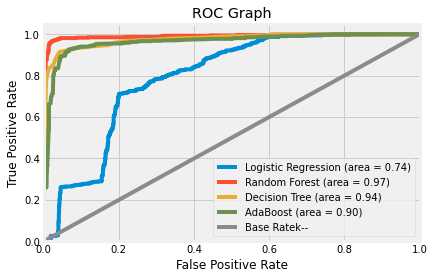

In [42]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

Building the Artificial Neural Network

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.

In [63]:
# Sequential to initialize a linear stack of layers
# Since this is a classification problem, we'll create a classifier variable
classifier = Sequential()

In [64]:
# adding layers to your network
classifier.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim = 18))

In [65]:
classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

In [66]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

Improving the Model Accuracy

In [71]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [72]:
def make_classifier():
    classifier = Sequential()
    classifier.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
    classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
    return classifier

In [73]:
classifier = KerasClassifier(build_fn = make_classifier, batch_size = 10, nb_epoch = 1)

In [74]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

Adding Dropout Regularization to Fight Over-Fitting

In [77]:
from keras.layers import Dropout

classifier = Sequential()
classifier.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim = 18))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

Hyperparameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

def make_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim = 18))
    classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier

In [79]:
classifier = KerasClassifier(build_fn = make_classifier)

In [80]:
params = {
    'batch_size':[20,35],
    'epochs':[2,3],
    'optimizer':['adam','rmsprop']
}

In [81]:
grid_search = GridSearchCV(estimator = classifier, param_grid = params, scoring = "accuracy", cv = 2)

In [82]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/2
Epoch 1/2
Epoch 1/2


C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\engine\training.py", line 108, in _method_wrapper
    return method(self, *args, **

C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\engine\training.py", line 108, in _method_wrapper
    return method(self, *args, **

Epoch 1/2
Epoch 1/3
Epoch 1/3
Epoch 1/3


C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\engine\training.py", line 108, in _method_wrapper
    return method(self, *args, **

Epoch 1/3
Epoch 1/2
Epoch 1/2
Epoch 1/2


C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\engine\training.py", line 108, in _method_wrapper
    return method(self, *args, **

Epoch 1/2
Epoch 1/3
Epoch 1/3
Epoch 1/3
Epoch 1/3
Epoch 1/2


C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 223, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 166, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\engine\training.py", line 108, in _method_wrapper
    return method(self, *args, **

ValueError: in user code:

    C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_18 is incompatible with the layer: expected axis -1 of input shape to have value 18 but received input with shape [None, 4]


In [83]:
best_param = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [84]:
best_param

{'batch_size': 20, 'epochs': 2, 'optimizer': 'adam'}

In [85]:
best_accuracy

nan

Logistic Regression

In [87]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [88]:
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [90]:
conmat = np.array(confusion_matrix(y_pred, y_test))
confusion_matrix = pd.DataFrame(conmat, index = ["Act_left", "Act_Not_left"], columns = ["Pred_left", "Pred_not_left"])
confusion_matrix

,Pred_left,Pred_not_left
Act_left,1581,390
Act_Not_left,133,146


In [91]:
accuracy_score(y_test, y_pred)

0.7675555555555555

In [92]:
logreg.coef_

array([[-3.73489767,  0.20088504,  0.17047834,  0.08518238]])

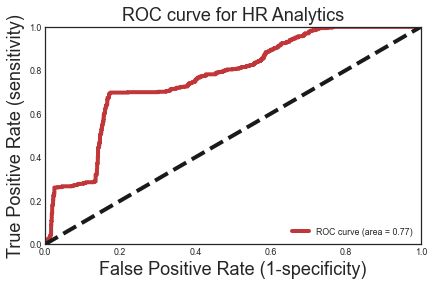

In [93]:
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-white')

Y_score = logreg.decision_function(X_test)

# For class malignant, find the area under the curve
FPR, TPR, THR = roc_curve(y_test, Y_score)
ROC_AUC = auc(FPR, TPR)

# Plot of a ROC curve for class 1 (has_cancer)
#plt.figure(figsize=[11,9])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-specificity)', fontsize=18)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=18)
plt.title('ROC curve for HR Analytics', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [94]:
#Lets do a Grid Search
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
C_vals= [11,12,13,14,15,16,17,18]
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty':penalties, 'C': C_vals}, verbose = True, cv = 5, scoring = 'roc_auc')
gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\

C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\

C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\

C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\

C:\Users\peter\anaconda3\envs\Python 38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.77450126        nan 0.77450109        nan 0.77450126
        nan 0.77450126        nan 0.77448685        nan 0.77448566
        nan 0.77448668        nan 0.77448685]
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [11, 12, 13, 14, 15, 16, 17, 18],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=True)

In [95]:
gs.best_params_

{'C': 11, 'penalty': 'l2'}

In [96]:
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

In [97]:
from sklearn.metrics import classification_report
gs_logreg = LogisticRegression(C=gs.best_params_["C"], penalty=gs.best_params_["penalty"], solver='liblinear')
gs_logreg.fit(X_train, y_train)
Y_ = gs_logreg.predict(X_test)

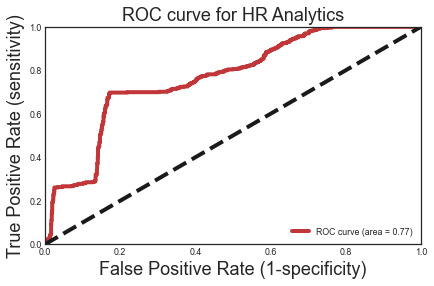

In [98]:
Y_score = gs_logreg.decision_function(X_test)

# For class malignant, find the area under the curve
FPR, TPR, THR = roc_curve(y_test, Y_score)
ROC_AUC = auc(FPR, TPR)

# Plot of a ROC curve for class 1 (has_cancer)
#plt.figure(figsize=[11,9])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1-specificity)', fontsize=18)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=18)
plt.title('ROC curve for HR Analytics', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=800,random_state=10)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.9804444444444445

In [48]:
df_lr=df.copy()
df_lr=pd.get_dummies(df_lr, columns = ['sales','salary'])
df_lr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [49]:
# fit a logistic regression model on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

X = np.asarray(df_lr.loc[:, df_lr.columns != 'left'])
y = np.asarray(df_lr.loc[:, df_lr.columns == 'left'])

In [50]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ROC AUC SCORE:  0.8153123857085633


Text(0, 0.5, 'True Positive Rate')

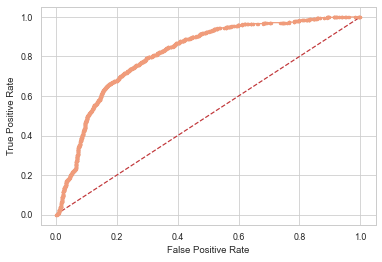

In [52]:
from sklearn.metrics import roc_auc_score,roc_curve
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train.ravel())

y_pred=model.predict(X_test)
y_proba=model.predict_proba(X_test)

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
print("ROC AUC SCORE: ",roc_auc_score(y_test, y_proba[:, 1]))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_proba[:,1])
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3428
           1       0.59      0.34      0.43      1072

    accuracy                           0.79      4500
   macro avg       0.70      0.63      0.65      4500
weighted avg       0.76      0.79      0.76      4500



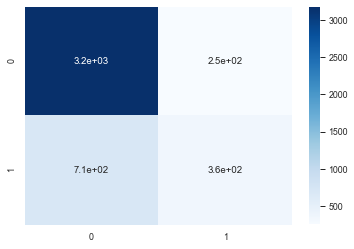

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True, cmap='Blues')

print(classification_report(y_test, y_pred))

Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)
gb_clf.fit(X_train, y_train.ravel())

y_gb=gb_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3428
           1       0.94      0.91      0.93      1072

    accuracy                           0.97      4500
   macro avg       0.96      0.95      0.95      4500
weighted avg       0.97      0.97      0.97      4500



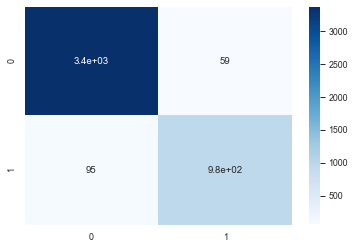

In [55]:
gb_matrix=confusion_matrix(y_test, y_gb)
sns.heatmap(gb_matrix, annot=True, cmap='Blues')
print(classification_report(y_test, y_gb))

In [61]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [62]:
y = df['left'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_model_train, X_validation, y_model_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=0)
print ('Model train set:', X_model_train.shape,  y_model_train.shape)
print ('Validation (hyperparameters test) set:', X_validation.shape,  y_validation.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Model train set: (12149, 20) (12149,)
Validation (hyperparameters test) set: (1350, 20) (1350,)
Test set: (1500, 20) (1500,)


In [64]:
def train_tree_with_validation():
    f1_scores = {}
    max_depth = range(1,20)
    impurity_decrease = [0.1,0.01,0.001,0.0001,0]
    for d in max_depth:
        for i in impurity_decrease:
            dTree = DecisionTreeClassifier(criterion="gini", max_depth = d, min_impurity_decrease=i)
            dTree.fit(X_model_train,y_model_train)
            f1_scores[(d,i)] = f1_score(y_validation, dTree.predict(X_validation))
    return max(f1_scores.keys(), key=(lambda key: f1_scores[key]))

In [65]:
best_hyper_values = train_tree_with_validation()
dTree = DecisionTreeClassifier(criterion="gini", max_depth = best_hyper_values[0], min_impurity_decrease=best_hyper_values[1])
dTree.fit(X_train,y_train)
print('Trained a decision tree with max_depth = {} and min_impurity_decrease = {}'.format(best_hyper_values[0],best_hyper_values[1]))
print('F1 score on test set: {:.3}'.format(f1_score(y_test, dTree.predict(X_test), average='weighted')))

Trained a decision tree with max_depth = 9 and min_impurity_decrease = 0
F1 score on test set: 0.979


In [66]:
dTree = DecisionTreeClassifier(criterion="gini", max_depth = 4, min_impurity_decrease=0.01)
dTree.fit(X_train,y_train)
print('F1 score with max_depth=4 on the test set: {:.3}'.format(f1_score(y_test, dTree.predict(X_test), average='weighted')))

F1 score with max_depth=4 on the test set: 0.966


In [69]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [73]:
features = df[['satisfaction','averageMonthlyHours','evaluation','projectCount','yearsAtCompany','workAccident']].copy()
features['workAccident'] = features['workAccident'].apply(lambda v: 1 if v else 0)
X = features
X[0:5]

,satisfaction,averageMonthlyHours,evaluation,projectCount,yearsAtCompany,workAccident
0,0.38,157,0.53,2,3,0
1,0.80,262,0.86,5,6,0
2,0.11,272,0.88,7,4,0
3,0.72,223,0.87,5,5,0
4,0.37,159,0.52,2,3,0


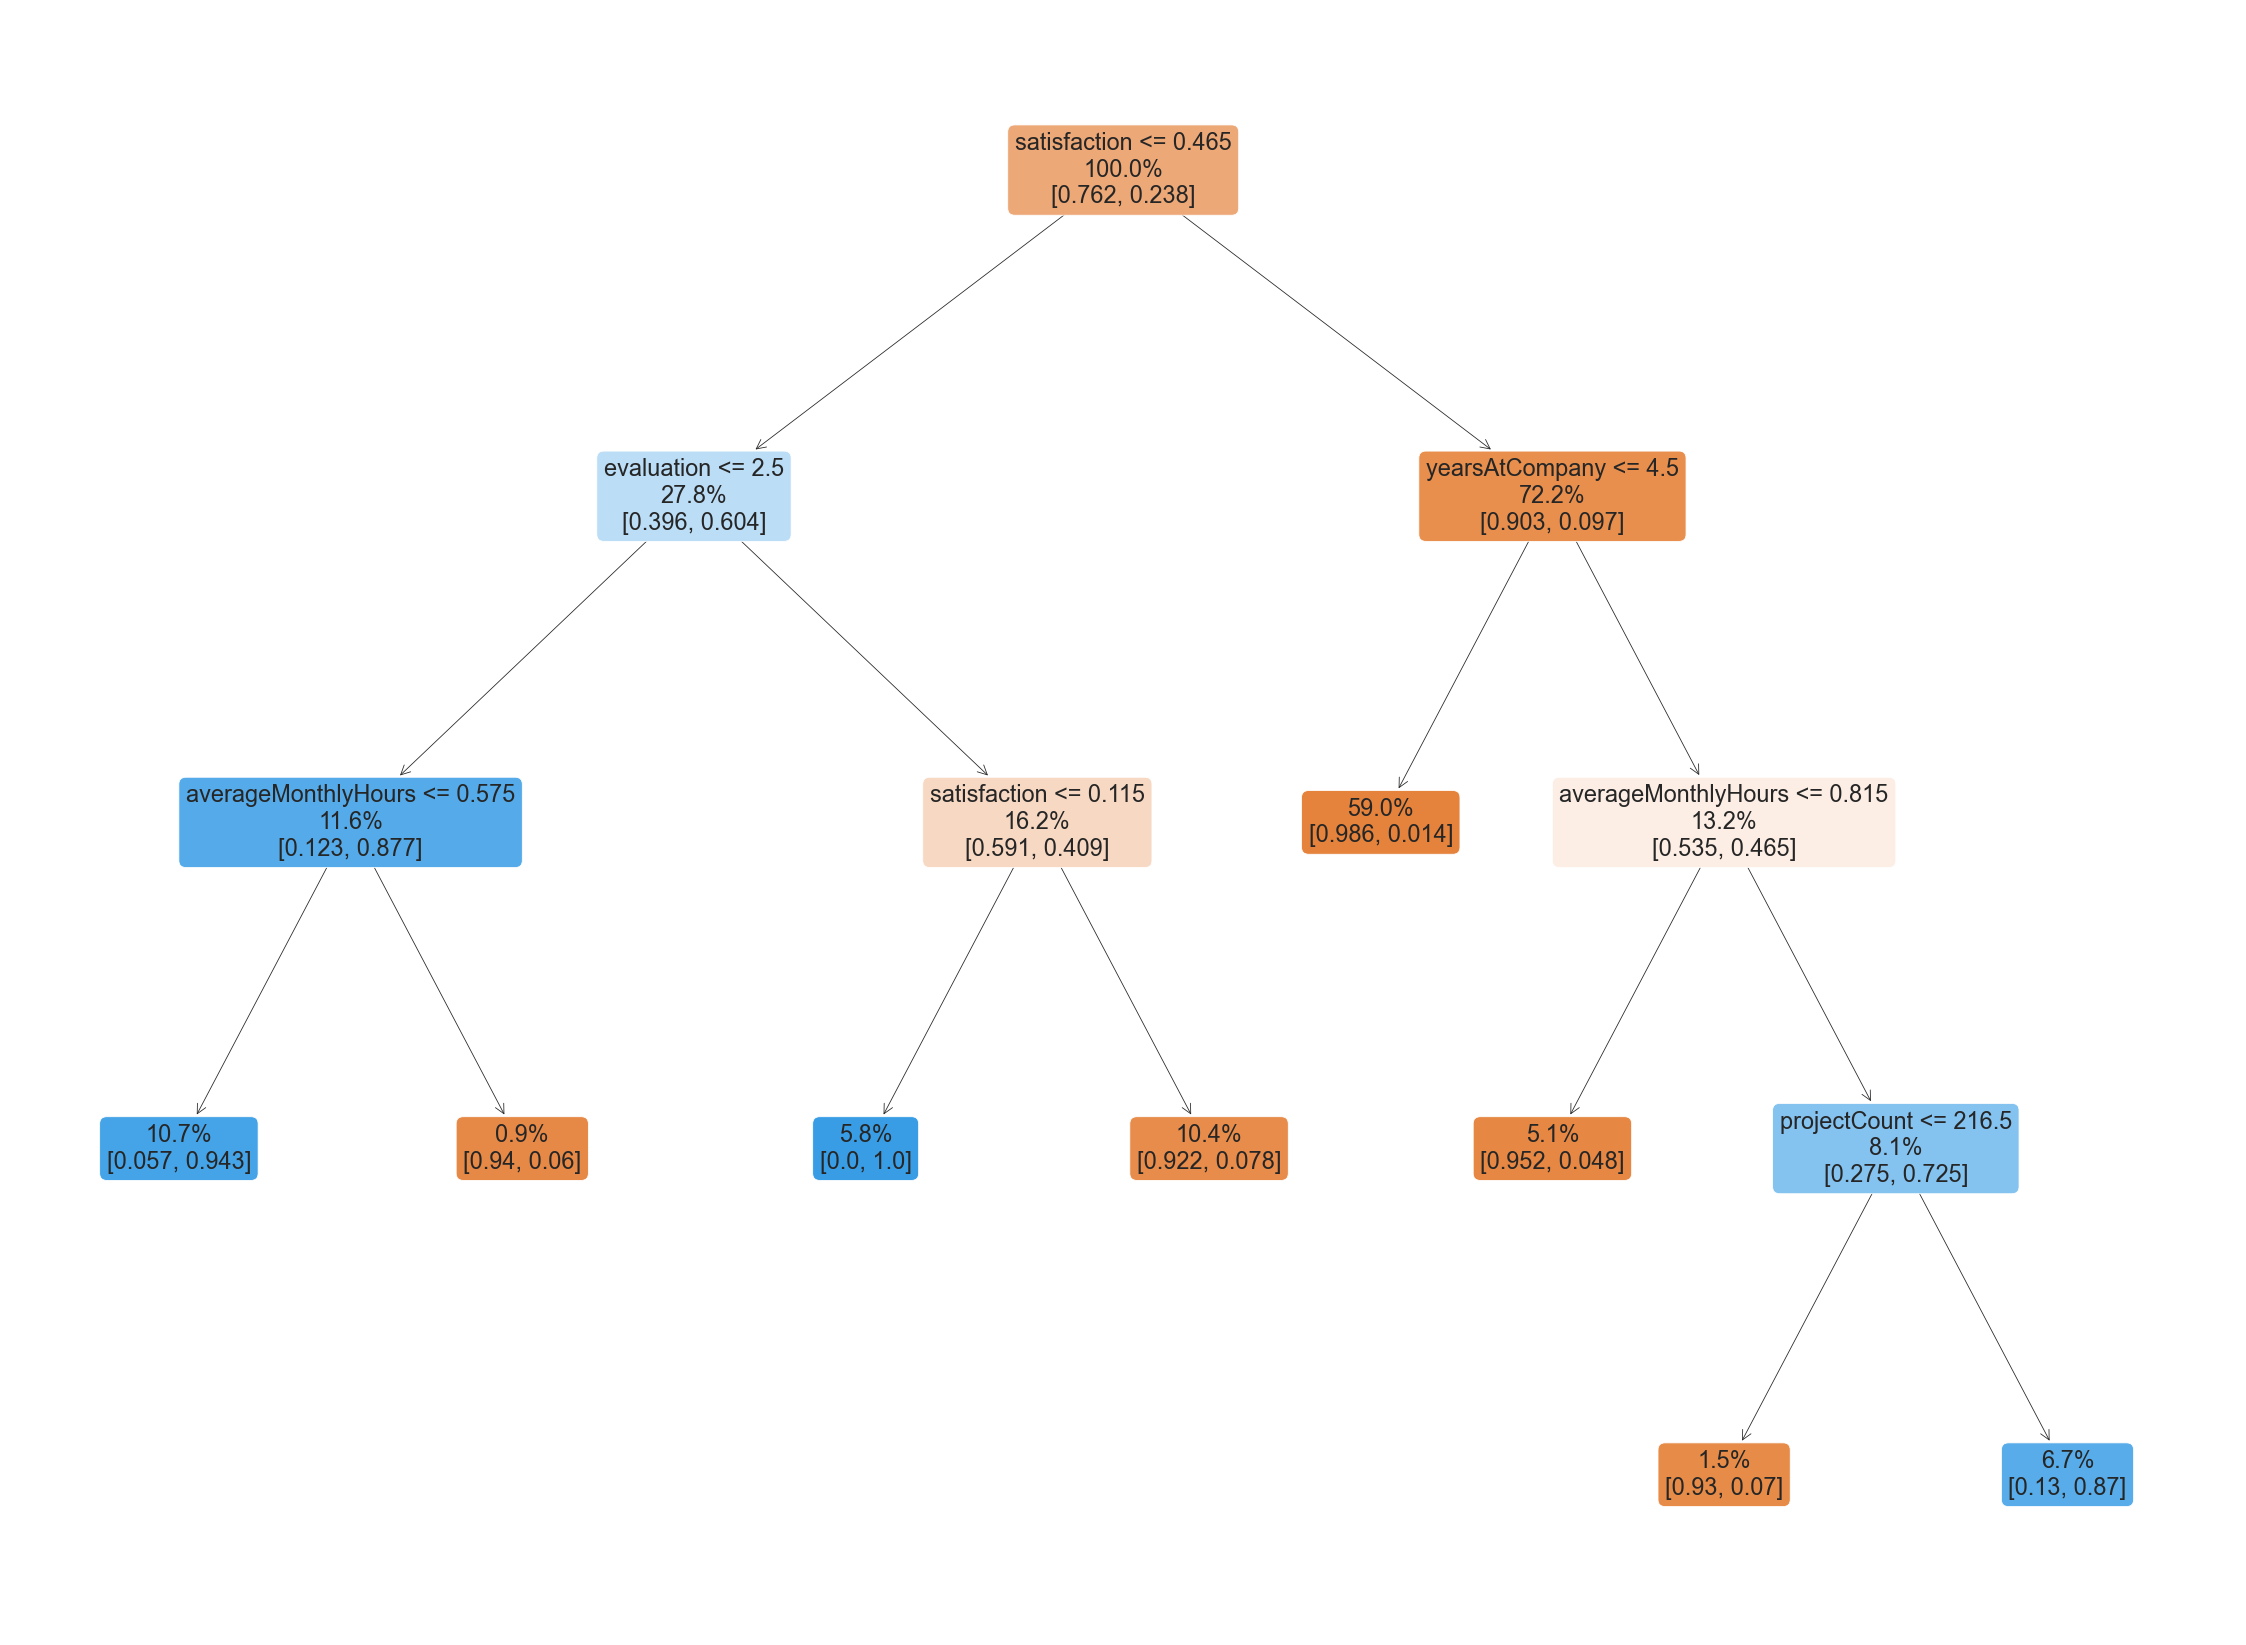

In [74]:
fig, ax = plt.subplots(figsize=(40,30))
tree.plot_tree(dTree, feature_names=features.columns,label='none',filled=True,proportion=True,impurity=False,rounded=True, max_depth=4)
plt.show()

Cross Validation

In [77]:
#Calling and importing the libraries to fit the Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
# Checking accuracy on our test and train datasets
from sklearn.metrics import accuracy_score
print('Random Forest Classifier Train accuracy: {:.3f}'.format(accuracy_score(y_train, rf.predict(X_train))))
print('Random Forest Classifier Test accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Classifier Train accuracy: 1.000
Random Forest Classifier Test accuracy: 0.990


In [80]:
# Printing Precision and Recall and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1141
           1       0.99      0.97      0.98       359

    accuracy                           0.99      1500
   macro avg       0.99      0.98      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [81]:
#Calling and importing the libraries to fit the Support Vector Machine model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [82]:
# Checking accuracy on our test and train datasets
from sklearn.metrics import accuracy_score
print('Support Vector Machine Train accuracy: {:.3f}'.format(accuracy_score(y_train, svc.predict(X_train))))
print('Support Vector Machine Test accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support Vector Machine Train accuracy: 0.784
Support Vector Machine Test accuracy: 0.781


In [83]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1141
           1       1.00      0.08      0.15       359

    accuracy                           0.78      1500
   macro avg       0.89      0.54      0.51      1500
weighted avg       0.83      0.78      0.70      1500



In [84]:
#Calling and importing the libraries to fit the Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [85]:
# Checking accuracy on our test and train datasets
from sklearn.metrics import accuracy_score
print('Gradient Boosting Classifier Train accuracy: {:.3f}'.format(accuracy_score(y_train, gb.predict(X_train))))
print('Gradient Boosting Classifier Test accuracy: {:.3f}'.format(accuracy_score(y_test, gb.predict(X_test))))

Gradient Boosting Classifier Train accuracy: 0.977
Gradient Boosting Classifier Test accuracy: 0.975


In [86]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1141
           1       0.97      0.92      0.95       359

    accuracy                           0.98      1500
   macro avg       0.97      0.96      0.97      1500
weighted avg       0.98      0.98      0.98      1500



In [150]:
# Creating X2 as the input dataframe and y2 as output feature for our REF model.
df_vars=df.columns.values.tolist()
y2=['left']
X2=[i for i in df_vars if i not in y2]

print('y variable being our output variable \n', y2)
print('X variable being our input dataframe \n', X2)

y variable being our output variable 
 ['left']
X variable being our input dataframe 
 ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'sales', 'salary']
